<a href="https://colab.research.google.com/github/samyzaf/notebooks/blob/main/fdm_de3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Solving a second order linear equation by FDM**

* We show how to find a numerical solution to
  an Euler-like equation
  with two initial conditions  

  $\qquad
  \left\{
  \begin{array}{l}
  (x^2-2x)y'' - 2y=0, \quad 0.5 < x < 1.5
  \\
  y(1) = 0
  \\
  y(1) = -1
  \end{array}
  \right.
  \newcommand{\Dx}{\Delta x}
  \newcommand{\Dy}{\Delta y}
  \newcommand{\Dz}{\Delta z}
  \newcommand{\Dt}{\Delta t}
  \newcommand{\Ds}{\Delta s}
  \newcommand{\Du}{\Delta u}
  \newcommand{\U}{\mathbf{U}}
  $  

* Our interval $[0.5,1.5]$ is divided to $2n$ equal subintervals
  with nodes $x_i = 0.5+i\Dx$, where $\Dx=1/n$,
  $i = 0,1,2,\ldots, 2n$.

* We use the central difference second derivative formula  

  $\qquad\displaystyle
  y'' = \frac{y_{i+1} - 2y_{i} + y_{i-1}}{\Dx^2}
  $

* We use $d=\Dx$, and plug into the equation

  $\qquad\displaystyle
   (x_i^2 - 2x_i)\left(\frac{y_{i+1} - 2y_{i} + y_{i-1}}{\Dx^2}\right) - 2y_i = 0
  $

* We receive a system of $2n+1$ linear equations
  in $n+1$ unknowns $y_i$, $i=0,1,2,\ldots,n$  

  $\qquad
  y_{i+1} - 2y_{i} + y_{i-1} - \frac{2d^2 y_i}{x_i^2 - 2x_i} = 0, \quad i=1,2,\ldots,2n-1
  $

* Compact form:  

  $\qquad
  y_{i+1} - \left(2 + \frac{2d^2}{x_i^2 - 2x_i}\right) y_{i} + y_{i-1} = 0
  $

In [1]:
%pip install -q https://samyzaf.com/fdmtools-4.zip
from fdmtools import *

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done


* First we define our grid parameters.
* For a start we use a small division size $N=100$.

In [2]:
a=0.5
b=1.5
n = 500
dx = (b-a)/(2*n)

# Linear system of (2n+1)x(2n+1) equations: AY = B
# A = coefficients matrix
A = np.zeros((2*n+1,2*n+1))
# Right side coefficients array
B = np.zeros(2*n+1)

# A = coefficients matrix for our (2n+1)x(2n+1) linear system
# These define 2n-1 linear equations out of 2n+1 that we need for our
# 2n+1 unknowns: Y[0], Y[1], ... Y[2n].
# Note that A[i,i-1], A[i,i], A[i,i+1] are the coefficients of Y[i-1], Y[i], Y[i+1], respectively
for i in range(1, 2*n):
    A[i,i-1] = 1
    A[i,i]   = -2 - (8*n**2 * dx**2)/(i**2 - 2*n*i - 3*n**2)
    A[i,i+1] = 1
    B[i]     = 0




* We need two extra linear equations to complete
  our $2n+1$ linear system.
* The first one comes from the first initial
  condition $y(1) = 0$.
* The value x=1 correspomds to x[n]=1 which is
  the middle point of our x array (0.5...1.5).
* So the equation is simply `y[n] = 0`
  which in our matrix notation is:
* (We will place it as equation 0 using
  the matrix notation)

In [3]:
A[0,n] = 1
B[n] = 0
# A[0] is the first matrix row, and A[0,n]=1 is the coefficient of Y[n]
# while B[n]=0 is the right side value of it
# The last linar equation comes from our second initial condition: y'(1) = -1
# which we place in the last row (2n) of our matrix A
A[2*n,n+1] = 1   # This is the coefficient of Y[n+1]
B[2*n] = -dx     # This is the right side value: 1 * Y[n+1] = -dx

# Then we solve our system
Y = np.linalg.solve(A, B)


## Sympy solution as power series


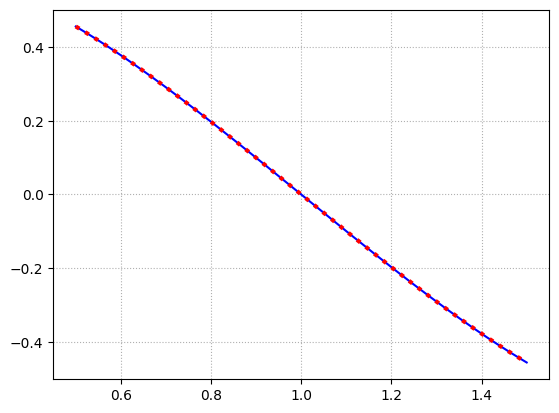

In [4]:
def F(x):
    c1 = 0 ; c2 = -1
    y = c1*(1 - (x - 1)**2) + c2*(x - (x - 1)**7/35 - (x - 1)**5/15 - (x - 1)**3/3 - 1)  # + O(x**9)
    return y

# Draw the solution
X = np.linspace(a, b, 2*n+1)
plt.plot(X, Y, color="blue", linewidth=1.5)
plt.grid('on', linestyle=':')
Y2 = [F(x) for x in X]
plt.plot(X, Y2, color="red", linewidth=3.0, linestyle=':')
plt.show()